<a href="https://colab.research.google.com/github/RogerOliveiraRS/Telecom_X-DataScience-Churn-Prediction/blob/main/Challenge_III_Final_Telecom_X.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###  **Telecom X – Parte 2: Prevendo Churn**

#### 📣 **História do Desafio**

Parabéns! 🎉 Você foi promovido após seu excelente desempenho na análise exploratória da evasão de clientes na Telecom X. Sua dedicação, clareza na comunicação dos dados e visão estratégica fizeram a diferença.

Agora, você foi convidado a integrar oficialmente a equipe de **Machine Learning** da empresa!

---

#### 🎯 **Missão**

Sua nova missão é desenvolver **modelos preditivos** capazes de prever quais clientes têm maior chance de cancelar seus serviços.

A empresa quer antecipar o problema da evasão, e cabe a você construir um pipeline robusto para essa etapa inicial de modelagem.

---

#### 🧠 **Objetivos do Desafio**

- Preparar os dados para a modelagem (tratamento, encoding, normalização).
- Realizar análise de correlação e seleção de variáveis.
- Treinar **dois ou mais modelos de classificação**.
- Avaliar o desempenho dos modelos com métricas.
- Interpretar os resultados, incluindo a **importância das variáveis**.
- Criar uma conclusão estratégica apontando os principais fatores que influenciam a evasão.

---

#### 🧰 **O que você vai praticar**

✅ Pré-processamento de dados para Machine Learning
✅ Construção e avaliação de modelos preditivos
✅ Interpretação dos resultados e entrega de insights
✅ Comunicação técnica com foco estratégico

---

#### 🚀 **Você agora é: Analista de Machine Learning Júnior**

A Telecom X está confiando na sua entrega para dar os próximos passos em direção a uma **solução de inteligência preditiva** eficaz. Boa sorte!

# **INÍCIO**

#Aquisição, limpeza e tratamento dos dados

###Importando bibliotecas

In [15]:
import pandas as pd
import json

###Importando os dados

In [16]:

dados = pd.read_json('/content/TelecomX_Data.json')
dados.info()
dados.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


###Normalização das colunas aninhadas retirando a coluna  'customerID'

In [17]:
# Normalização das colunas aninhadas
df = pd.concat([
    dados[['customerID', 'Churn']],
    pd.json_normalize(dados['customer'], sep='_'),
    pd.json_normalize(dados['phone'], sep='_'),
    pd.json_normalize(dados['internet'], sep='_'),
    pd.json_normalize(dados['account'], sep='_')
], axis=1)

# Verificando estrutura após expansão
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


###Eliminando linhas duplicadas

In [18]:
df.duplicated(subset=['customerID'])
df = df.drop_duplicates(subset=['customerID'], keep='first')
print("Number of rows after removing duplicates:", len(df))


Number of rows after removing duplicates: 7267


###Convertendo 'Charges_Total' para tipo numérico

In [19]:
#  Converte 'Charges_Total' para tipo numérico
df['Charges_Total'] = pd.to_numeric(df['Charges_Total'], errors='coerce')

#  Verifica se houve conversão com valores nulos
print("Valores nulos em Charges_Total após conversão:", df['Charges_Total'].isnull().sum())


Valores nulos em Charges_Total após conversão: 11


In [20]:
df = df[df['Charges_Total'].notnull()]
print("Valores nulos em Charges_Total após conversão:", df['Charges_Total'].isnull().sum())


Valores nulos em Charges_Total após conversão: 0


###Retirando a coluna 'customerID'

In [25]:
df.drop('customerID', axis=1, inplace=True)
df.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total,AvgCharge
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,65.922222
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,60.266667
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,70.212500
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,95.219231
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,89.133333


###Identificando  e Removendo Valores Nulos

In [22]:
df.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


###Criando mais uma coluna com o gasto médio por mês ('AvgCharge')

In [23]:
df['AvgCharge'] = df['Charges_Total'] / df['tenure']
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total,AvgCharge
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,65.922222
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,60.266667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,70.212500
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,95.219231
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,89.133333


###Verificando se há elementos NaN

In [26]:
print(df.isnull().sum())

Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges_Monthly     0
Charges_Total       0
AvgCharge           0
dtype: int64


###Dicionário:

In [24]:
# customerID: número de identificação único de cada cliente
# Churn: se o cliente deixou ou não a empresa
# gender: gênero (masculino e feminino)
# SeniorCitizen: informação sobre um cliente ter ou não idade igual ou maior que 65 anos
# Partner: se o cliente possui ou não um parceiro ou parceira
# Dependents: se o cliente possui ou não dependentes
# tenure: meses de contrato do cliente
# PhoneService: assinatura de serviço telefônico
# MultipleLines: assisnatura de mais de uma linha de telefone
# InternetService: assinatura de um provedor internet
# OnlineSecurity: assinatura adicional de segurança online
# OnlineBackup: assinatura adicional de backup online
# DeviceProtection: assinatura adicional de proteção no dispositivo
# TechSupport: assinatura adicional de suporte técnico, menos tempo de espera
# StreamingTV: assinatura de TV a cabo
# StreamingMovies: assinatura de streaming de filmes
# Contract: tipo de contrato
# PaperlessBilling: se o cliente prefere receber online a fatura
# PaymentMethod: forma de pagamento
# Charges.Monthly: total de todos os serviços do cliente por mês
# Charges.Total: total gasto pelo cliente
# AvgCharge: média dos gastos do cliente por contrato

#EDA — Análise Exploratória de Dados

##Distribuição Geral do Churn

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

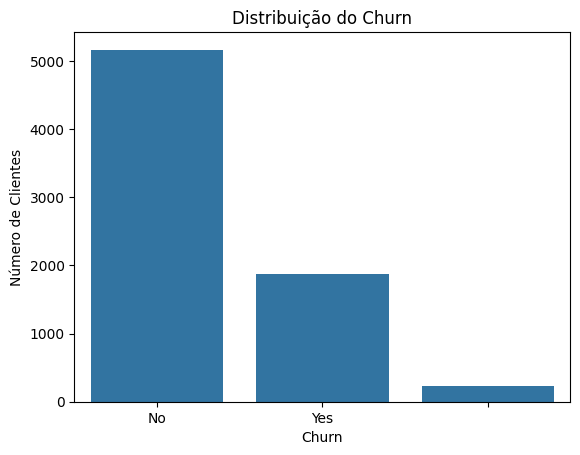

In [29]:
#  Distribuição do churn
sns.countplot(x='Churn', data=df)
plt.title('Distribuição do Churn')
plt.xlabel('Churn')
plt.ylabel('Número de Clientes')
plt.show()
